# Test Learning Perceptron

In [1]:
import sys
import matplotlib.pyplot as plt
import scipy as sp
from random import seed, uniform
sys.path.append("../code")
from learning_perceptron.learning import LearningPerceptron
%matplotlib inline

Definir seed:

In [2]:
seed(2)

Definir constantes:

In [3]:
MIN_X = -50.0
MAX_X = 50.0
MIN_Y = -50.0
MAX_Y = 50.0
LR = 0.1
N = 1000

Definir linea divisora

In [4]:
m = uniform(-5.0, 5.0)
n = uniform(-1.0, 1.0)

def line_xtoy(x: float) -> float:
    return (m * x) + n

def line_ytox(y: float) -> float:
    return (y - n) / m

def define_point(candid_x: float) -> (float, float):
    candid = line_xtoy(candid_x)
    if candid > 0:
        if candid < MAX_Y:
            point = (candid_x, candid)
        else:
            point = (line_ytox(MAX_Y), MAX_Y)
    else:
        if candid > MIN_Y:
            point = (candid_x, candid)
        else:
            point = (line_ytox(MIN_Y), MIN_Y)
    return point

def line() -> ((float, float), (float, float)):
    first_point = define_point(MIN_X)
    second_point = define_point(MAX_X)
    return (first_point, second_point)

def above_line(x: float, y: float) -> bool:
    return y > ((x * m) + n)

Show defined line:

In [5]:
first_point, second_point = line()

print(
    "Line:\n\tm: {} and n: {}\n\tFirst Point: ({}, {})\n\tSecond Point: ({}, {})".format(
        m, n, first_point[0], first_point[1], second_point[0], second_point[1]
    )
)

Line:
	m: 4.560342718892494 and n: 0.8956549741186988
	First Point: (-11.160489049050902, -50.0)
	Second Point: (10.767687442097898, 50.0)


Función para mostrar resultados

In [6]:
def results(perceptron: LearningPerceptron) -> ([float], [float], [float], [float]):
    X_1 = []
    Y_1 = []
    X_2 = []
    Y_2 = []
    
    for i in range(N):
        x = uniform(MIN_X, MAX_X)
        y = uniform(MIN_Y, MAX_Y)
        if perceptron.output(x, y):
            X_1.append(x)
            Y_1.append(y)
        else:
            X_2.append(x)
            Y_2.append(y)
    
    return X_1, Y_1, X_2, Y_2

def plot_result(X_1: [float], Y_1: [float], X_2: [float], Y_2: [float],
                first_point: (float, float),
                second_point: (float, float),
                perceptron: LearningPerceptron) -> None:
    X = [first_point[0], second_point[0]]
    Y = [first_point[1], second_point[1]]
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.plot(X_1, Y_1, '.')
    ax.plot(X_2, Y_2, '.')
    ax.plot(X, Y)
    ax.set_xlabel("x", fontsize=12)
    ax.set_ylabel("y", fontsize=12)
    ax.set_title("{}, trainings: {}".format(perceptron.name, perceptron.number_of_training), fontsize=14)
    ax.grid()
    
    return 

Definir perceptron

In [7]:
first_perceptron = LearningPerceptron(LR, "First Perceptron")
w1, w2, b = first_perceptron.get_weights()
print(
    "Perceptron: {}\n\tInitial weight\n\t\tw1: {}\tw2: {}\tb: {}".format(
        first_perceptron.name, w1, w2, b
    )
)

Perceptron: First Perceptron
	Initial weight
		w1: -1.7737945290927652	w2: -1.6605120193643135	b: 1.3419955125177983


## Sin entrenamiento

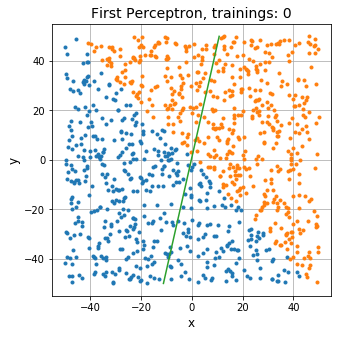

In [8]:
X_1, Y_1, X_2, Y_2 = results(first_perceptron)
plot_result(X_1, Y_1, X_2, Y_2, first_point, second_point, first_perceptron)

## Funciones para entrenamiento

In [9]:
def training_set(size: int) -> [(float, float, bool)]:
    out = []
    for i in range(size):
        x = uniform(MIN_X, MAX_X)
        y = uniform(MIN_Y, MAX_Y)
        datum = x, y, above_line(x, y)
        out.append(datum)
    return out

from matplotlib.axes import Axes

def train(perceptron: LearningPerceptron, size: int, ax: Axes, label: str or None=None) -> None:
    precision_data = []
    number_of_training = []
    training = training_set(size)
    
    X_1, Y_1, X_2, Y_2 = results(perceptron)
    FP, TP, _, _ = confusion_matrix(X_1, Y_1, X_2, Y_2)
    precision_data.append(precision(FP, TP))
    number_of_training.append(perceptron.number_of_training)
    for i in range(size):
        perceptron.train([training[i]])
        X_1, Y_1, X_2, Y_2 = results(perceptron)
        FP, TP, _, _ = confusion_matrix(X_1, Y_1, X_2, Y_2)
        precision_data.append(precision(FP, TP))
        number_of_training.append(perceptron.number_of_training)
    
    ax.plot(number_of_training, precision_data, label=label)
    
    return

def particular_train(perceptron: LearningPerceptron, size: int) -> None:
    fig, ax = plt.subplots(figsize=(5, 5))
    
    train(perceptron, size, ax)
    
    ax.set_xlabel("Number of training", fontsize=12)
    ax.set_ylabel("Precision", fontsize=12)
    ax.set_title("Training {} with {} trainings".format(perceptron.name, perceptron.number_of_training), fontsize=14)
    ax.grid()
    
    return 

def confusion_matrix(
    X_1: [float], Y_1: [float],
    X_2: [float], Y_2: [float]) -> (int, int, int, int):
    FP, TP, FN, TN = (0, 0, 0, 0)
    for i, _ in enumerate(X_1):
        success = above_line(X_1[i], Y_1[i])
        if success:
            TP += 1
        else:
            FP += 1
    for i, _ in enumerate(X_2):
        fail = above_line(X_2[i], Y_2[i])
        if fail:
            FN += 1
        else:
            TN += 1
    return FP, TP, FN, TN

def precision(FP: int, TP: int):
    return TP / (TP + FP)

In [10]:
FP, TP, FN, TN = confusion_matrix(X_1, Y_1, X_2, Y_2)
print("FP: {}, TP: {}, FN: {}, TN: {}".format(FP, TP, FN, TN))
print("Precision: {}".format(precision(FP, TP)))

FP: 134, TP: 349, FN: 156, TN: 361
Precision: 0.722567287784679


## Con dos seciones de entrenamiento

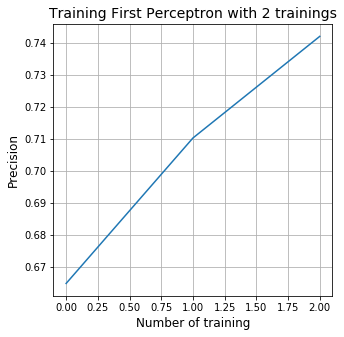

In [11]:
particular_train(first_perceptron, 2)

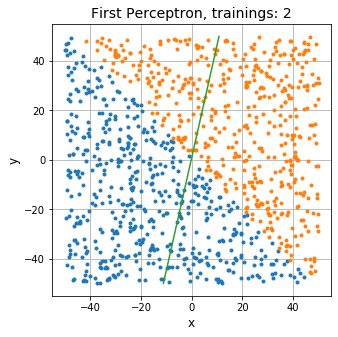

In [12]:
r = results(first_perceptron)
plot_result(r[0], r[1], r[2], r[3], first_point, second_point, first_perceptron)

## Con 20 seciones

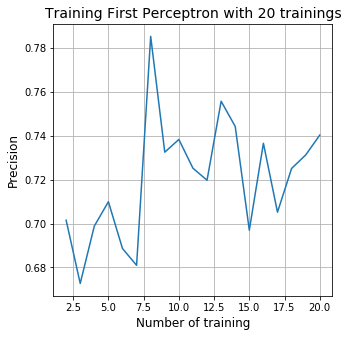

In [13]:
particular_train(first_perceptron, 18)

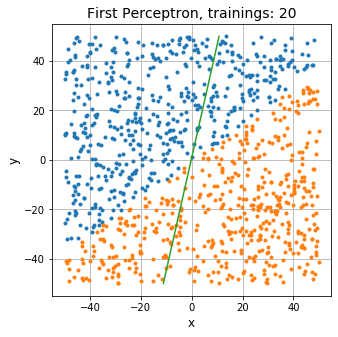

In [14]:
r = results(first_perceptron)
plot_result(r[0], r[1], r[2], r[3], first_point, second_point, first_perceptron)

## Con 50 seciones

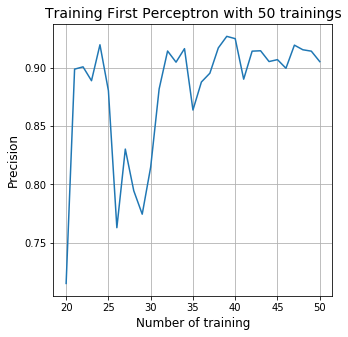

In [15]:
particular_train(first_perceptron, 30)

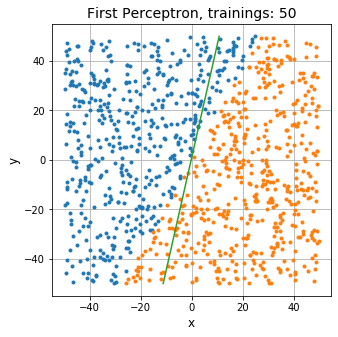

In [16]:
r = results(first_perceptron)
plot_result(r[0], r[1], r[2], r[3], first_point, second_point, first_perceptron)

## Diferentes tasas de aprendizaje

Tazas de aprendizaje

In [17]:
LRs = sp.linspace(0, 1, 11)

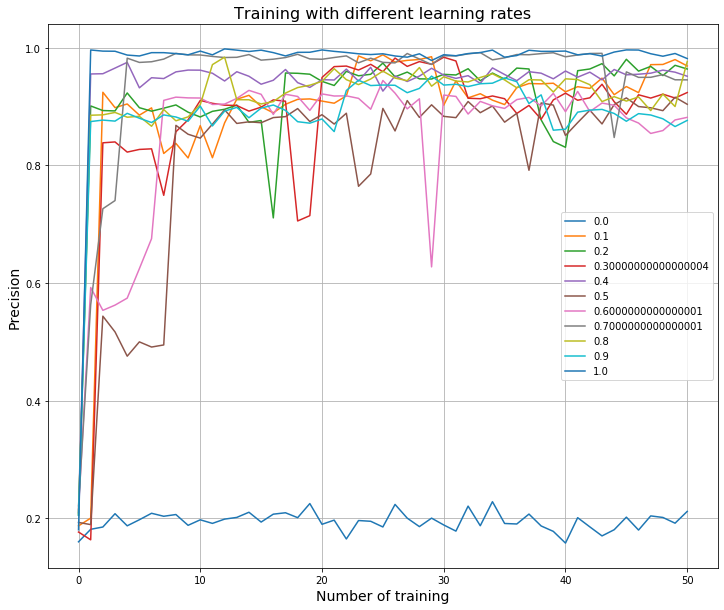

In [18]:
from perceptron import Perceptron

fig, ax = plt.subplots(figsize=(12, 10))

for lr in LRs:
    test_perceptron = Perceptron("test", 1.5, -1.5, 0)
    
    a_perceptron = LearningPerceptron(lr, "Perceptron{}".format(lr))
    a_perceptron.perceptron = test_perceptron
    
    train(a_perceptron, 50, ax, label=str(lr))
    
ax.set_xlabel("Number of training", fontsize=14)
ax.set_ylabel("Precision", fontsize=14)
ax.set_title("Training with different learning rates", fontsize=16)
ax.legend(fontsize = 10)
    
ax.grid()